In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('dataset.csv')

data.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


# Examine the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1885 non-null   object 
 1   Value                 1882 non-null   float64
 2   Value_Classification  1882 non-null   object 
 3   BTC_Closing           1885 non-null   float64
 4   BTC_Volume            1885 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 73.8+ KB


In [7]:
data.describe()

,Value,BTC_Closing,BTC_Volume
count,1882.000000,1885.000000,1.885000e+03
mean,42.394261,20579.140472,2.676660e+10
std,22.087394,16710.842873,1.953785e+10
min,5.000000,3236.761719,2.923670e+09
25%,24.000000,7879.071289,1.373184e+10
50%,39.000000,11429.506836,2.459894e+10
75%,56.000000,32702.025391,3.569001e+10
max,95.000000,67566.828125,3.509679e+11


# Change Date to Datetime 
Check the date ranges 

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1885 non-null   datetime64[ns]
 1   Value                 1882 non-null   float64       
 2   Value_Classification  1882 non-null   object        
 3   BTC_Closing           1885 non-null   float64       
 4   BTC_Volume            1885 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 73.8+ KB


In [9]:
data['Date'].min()

Timestamp('2018-02-01 00:00:00')

In [10]:
data['Date'].max()

Timestamp('2023-03-31 00:00:00')

## Check the data distribution 

<AxesSubplot:xlabel='BTC_Volume', ylabel='Count'>

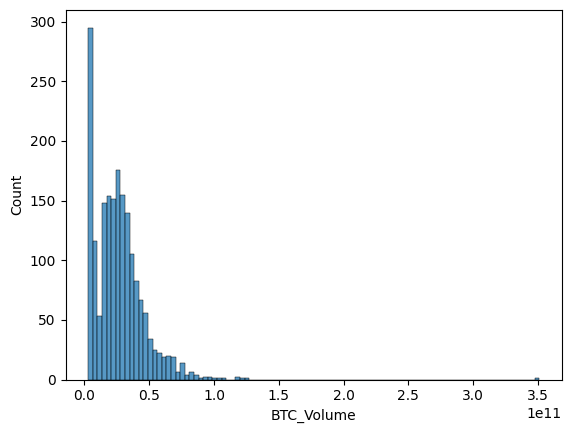

In [12]:
sns.histplot(data['BTC_Volume'])

<AxesSubplot:xlabel='Value', ylabel='Count'>

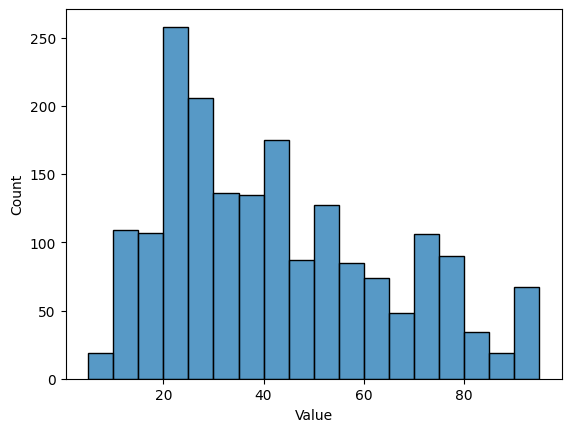

In [13]:
sns.histplot(data['Value'])

<AxesSubplot:xlabel='BTC_Closing', ylabel='Count'>

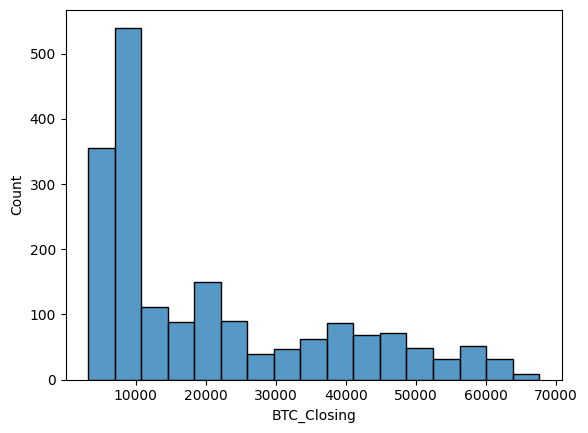

In [14]:
sns.histplot(data['BTC_Closing'])

# Calculate the correlation between the fear and greed index value and BTC volume and btc closing price 

Answering the questions ?
1. What is the correlation between the fear and greed index value and BTC Volume 
2. What is the correlation between the fear and greed index value and BTC closing price

In [3]:
feature_one = data['Value']
feature_two = data['BTC_Volume']
feature_three = data['BTC_Closing']

In [4]:
volume_corr = feature_one.corr(feature_two)

volume_corr

0.3099902505195178

In [5]:
closing_corr = feature_one.corr(feature_three)

closing_corr

0.24359063488550264

# Plot Correlation

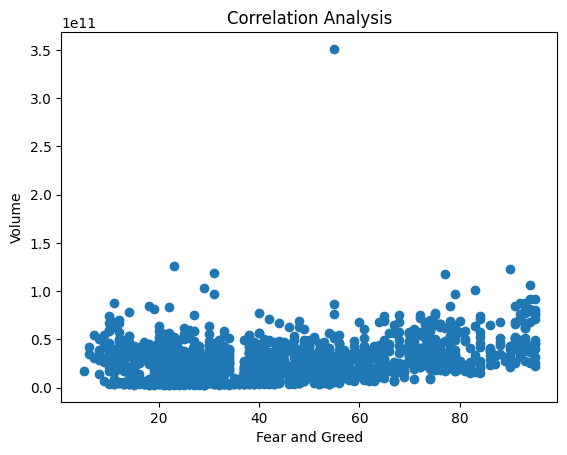

In [11]:
plt.scatter(feature_one, feature_two)
plt.xlabel('Fear and Greed')
plt.ylabel('Volume')
plt.title('Correlation Analysis')
plt.show()

# Scale Dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
features = data[['Value', 'BTC_Volume']]

features.head()

,Value,BTC_Volume
0,30.0,9959400448
1,15.0,12726899712
2,40.0,7263790080
3,24.0,7073549824
4,11.0,9285289984


In [18]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)


In [19]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [20]:
scaled_df.head()

,Value,BTC_Volume
0,0.277778,0.020215
1,0.111111,0.028167
2,0.388889,0.012470
3,0.211111,0.011923
4,0.066667,0.018278


In [21]:
correlation = scaled_df['Value'].corr(scaled_df['BTC_Volume'])

correlation

0.30999025051951795